In [396]:

################ IMPORTS ################

import pandas as pd
import numpy as np
import sklearn as sk
from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Data Visualization

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')
pd.set_option('display.max_columns',999)


In [397]:

############## DATA IMPORT ##############

train = pd.read_csv('../data/house_prices_dataset.csv')
display(train.sample(5))


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1096  1097          70       RM         60.0     6882   Pave   NaN      Reg   
752    753          20       RL         79.0     9236   Pave   NaN      IR1   
831    832         160       FV         30.0     3180   Pave  Pave      Reg   
847    848          20       RL         36.0    15523   Pave   NaN      IR1   
220    221          20       RL         73.0     8990   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1096         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
752          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
831          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
847          Lvl    AllPub   CulDSac       Gtl      CollgCr       Norm   
220          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1096       Norm     1Fam     2Story            6            7       1914   
752        Norm     1Fam     1Story            6            5       1997   
831        Norm   TwnhsE     2Story            7            5       2005   
847        Norm     1Fam     1Story            5            6       1972   
220        Norm     1Fam     1Story            7            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1096          2006     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
752           1997     Gable  CompShg     VinylSd     VinylSd        NaN   
831           2005     Gable  CompShg     MetalSd     MetalSd        NaN   
847           1972     Gable  CompShg     HdBoard     Plywood        NaN   
220           2006     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1096         0.0        TA        TA      PConc       TA       TA   
752          0.0        TA        Gd      PConc       Gd       TA   
831          0.0        TA        TA      PConc       Gd       TA   
847          0.0        TA        TA     CBlock       TA       TA   
220          0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1096           No          Unf           0          Unf           0   
752            Gd          GLQ        1200          Unf           0   
831            No          Unf           0          Unf           0   
847            Av          BLQ         460          Unf           0   
220            Mn          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1096        684          684    GasA        TA          Y      SBrkr   
752         279         1479    GasA        Ex          Y      SBrkr   
831         600          600    GasA        Ex          Y      SBrkr   
847         404          864    GasA        Ex          Y      SBrkr   
220        1498         1498    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1096       773       582             0       1355             0             0   
752       1494         0             0       1494             1             0   
831        520       600            80       1200             0             0   
847        864         0             0        864             1             0   
220       1498         0             0       1498             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1096         1         1             3             1          Gd   
752          2         0             3             1          Gd   
831          2         1             2             1          Gd   
847          1         0             3             1          TA   
220          2         0             2             1          Gd   

   

In [398]:

############## DATA TYPES ###############

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [399]:

############## CHANGE DATA TYPES ##############

# After checking which data types, we should change categories to objects
# We can populate the object_train list below with the corresponding column names:

# Convert data to object
# object_train = []
# train[object_train] = train[object_train].astype('object')

# We should also convert data to numeric, especially to float64 for good measure 

# Convert data to numeric
# numeric_train = train.select_dtypes(include=[np.number]).columns.tolist()
# train[numeric_train] = train[numeric_train].astype('float64')

In [400]:

############## ASSESS MISSING DATA ##############

variables = train.columns

count = []

for variable in variables:
    length = train[variable].count()
    count.append(length)                                # This will populate count with all variable counts
    
count_pct = np.round(100 * pd.Series(count) / len(train), 2)
count = pd.Series(count)

missing = pd.DataFrame()                                # Initiates the dataframe
missing['variables'] = variables                        # Populates it with the variables list
missing['count'] = len(train) - count       
missing['count_pct'] = 100 - count_pct
missing = missing[missing['count_pct'] > 0]             # If missing % = 0, variable will be removed from this list 
missing.sort_values(by=['count_pct'], inplace=True)     # Will sort by % of missing values
missing_train = np.array(missing['variables'])          # And make the array

display(missing)


variables  count  count_pct
42    Electrical      1       0.07
26    MasVnrArea      8       0.55
30      BsmtQual     37       2.53
31      BsmtCond     37       2.53
33  BsmtFinType1     37       2.53
32  BsmtExposure     38       2.60
35  BsmtFinType2     38       2.60
64    GarageCond     81       5.55
63    GarageQual     81       5.55
60  GarageFinish     81       5.55
59   GarageYrBlt     81       5.55
58    GarageType     81       5.55
3    LotFrontage    259      17.74
57   FireplaceQu    690      47.26
25    MasVnrType    872      59.73
73         Fence   1179      80.75
6          Alley   1369      93.77
74   MiscFeature   1406      96.30
72        PoolQC   1453      99.52

Text(0.5, 1.0, 'Count of missing training data as total records')

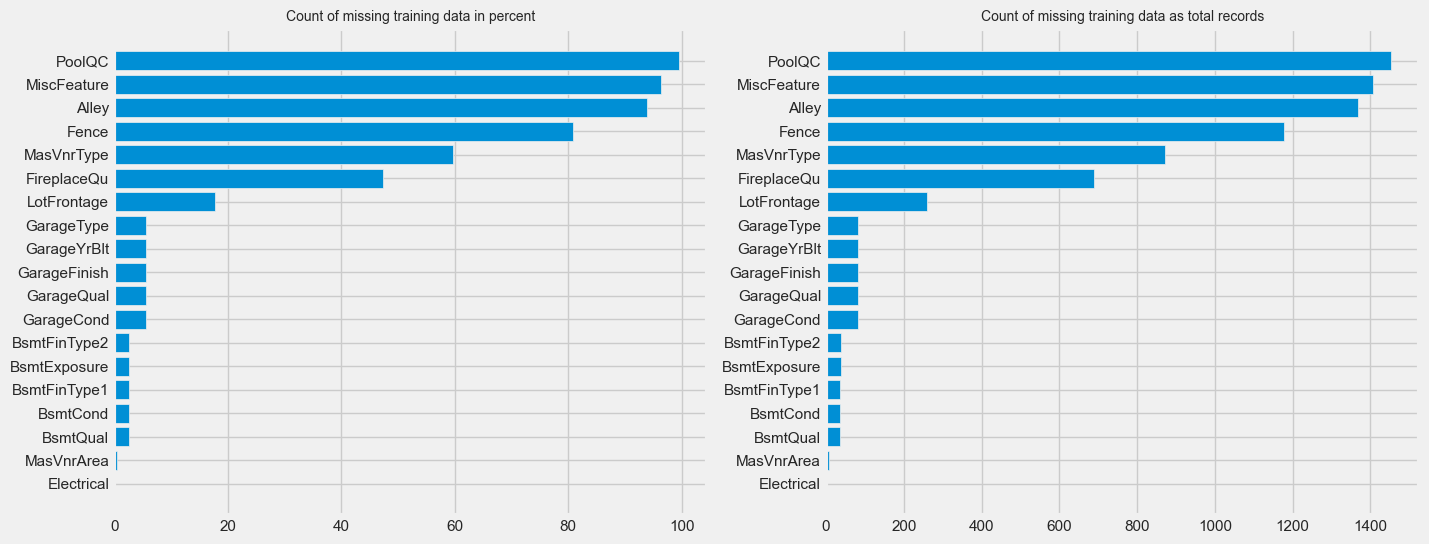

In [402]:

############ PLOT GRAPHS WITH MISSING DATA ##############

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Plots missing data in percentage
axes[0].barh(missing['variables'], missing['count_pct'])
axes[0].set_title('Count of missing training data in percent', fontsize=10)

# Plots total row number of missing data
axes[1].barh(missing['variables'], missing['count'])
axes[1].set_title('Count of missing training data as total records', fontsize=10)


From the graphs above, one can have an idea of some of the variables that have missing data.
One should take care to handle those issues:

High proportion (>40%) - consider removing the feature
Moderate proportion (5 to 40%) - consider different imputation procedures (Mean, Median, Mode, Predictive, KNN, etc.)
Low proportion (<5%) - consider simple imputation (Mean, Median), or remove the rows with missing values

In [ ]:

############ CODE EXAMPLES ##############

# drop columns with missing values > 40%
#
# threshold = 0.4 * len(train)
# train_clean = train.dropna(axis=1, thresh=threshold)

# Mean Imputation - Replace missing values with the mean (does not work with non numerical values)
#
# imputer = SimpleImputer(strategy='mean')
# train_imputed = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)

# Impute missing values using KNN
#
# imputer = KNNImputer(n_neighbors=5)
# train_imputed = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)


In [ ]:

########### GET FEATURES AND TARGET #############

# Get target
target = 'SalePrice'

# Get quantitative features and delete the unnecessary features
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')                # Remove target 
quantitative.remove('Id')                       # Remove ID 

# Get categorical features
categorical = [f for f in train.columns if train.dtypes[f] == 'object']


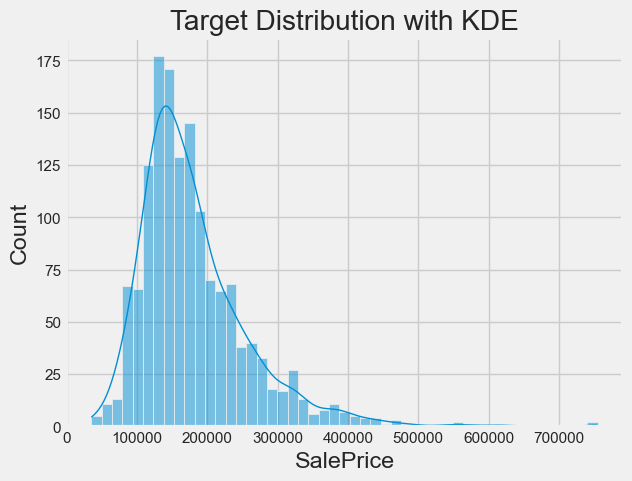

In [ ]:

########### CREATE HISTOGRAM OF TARGET ###########

sns.histplot(train[target], kde=True, line_kws={'linewidth': 1})
plt.title('Target Distribution with KDE')


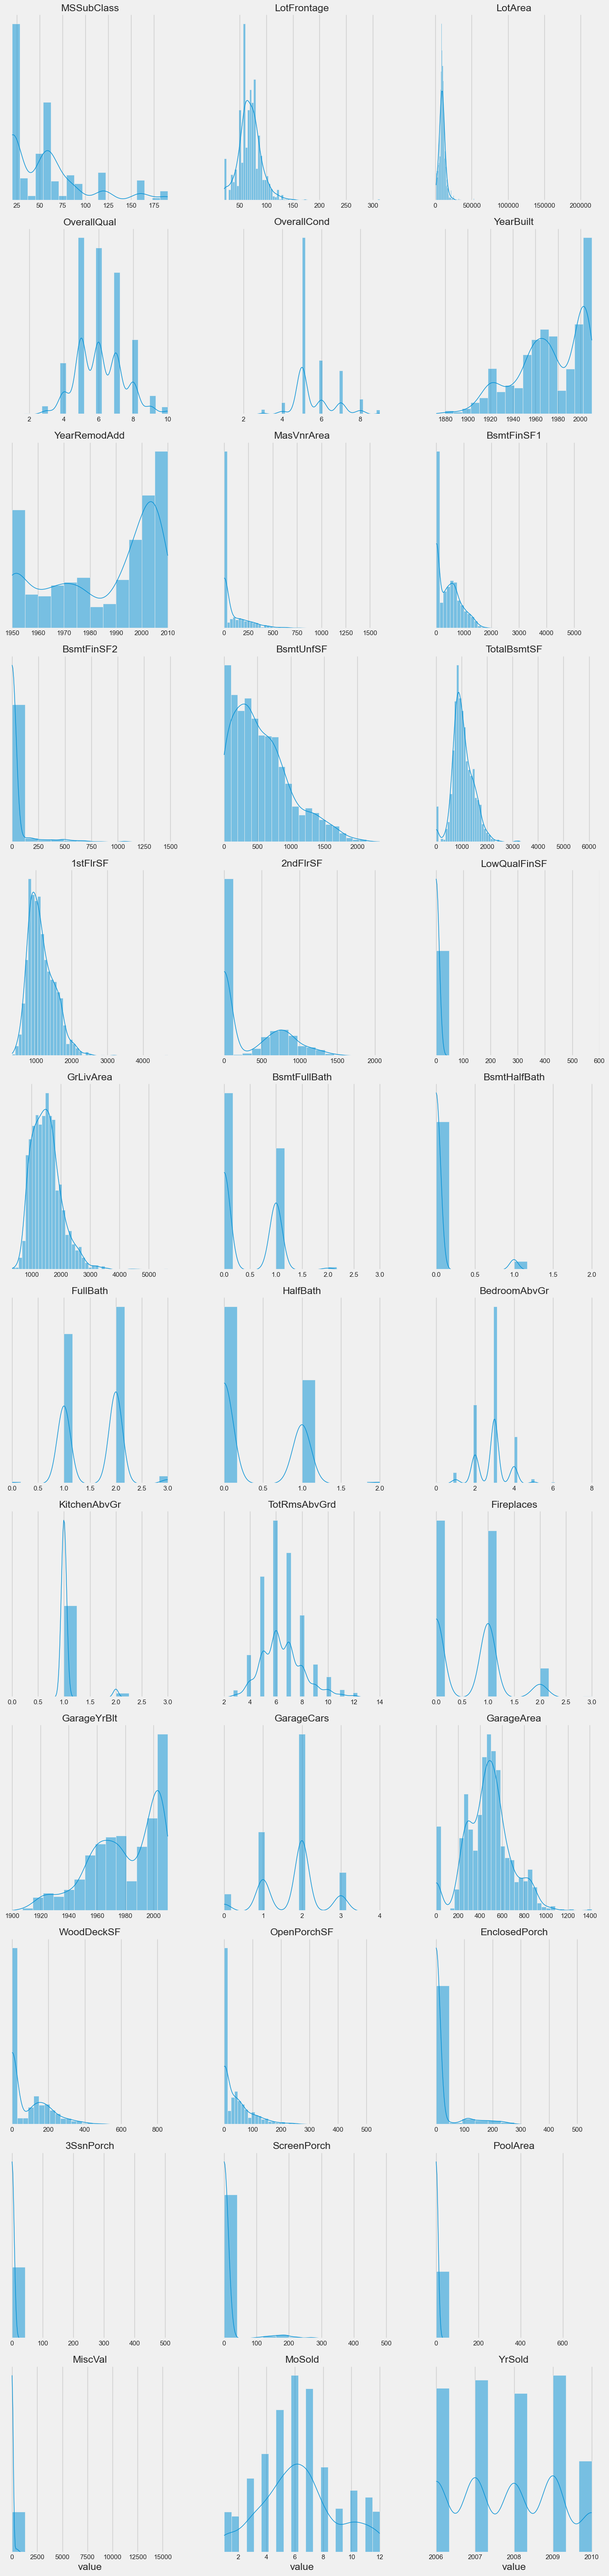

In [ ]:

########### HISTOGRAMS OF QUANTITATIVE FEATURES ###########

# Assuming DataFrame 'train' and 'quantitative' is the list of columns
f = pd.melt(train, value_vars=quantitative)

# Create a FacetGrid for plotting
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)

# Map the histograms with KDE
g.map(sns.histplot, "value", kde=True, line_kws={'linewidth': 1})
g.set_titles(col_template="{col_name}")
g.set(yticks=[], ylabel='')


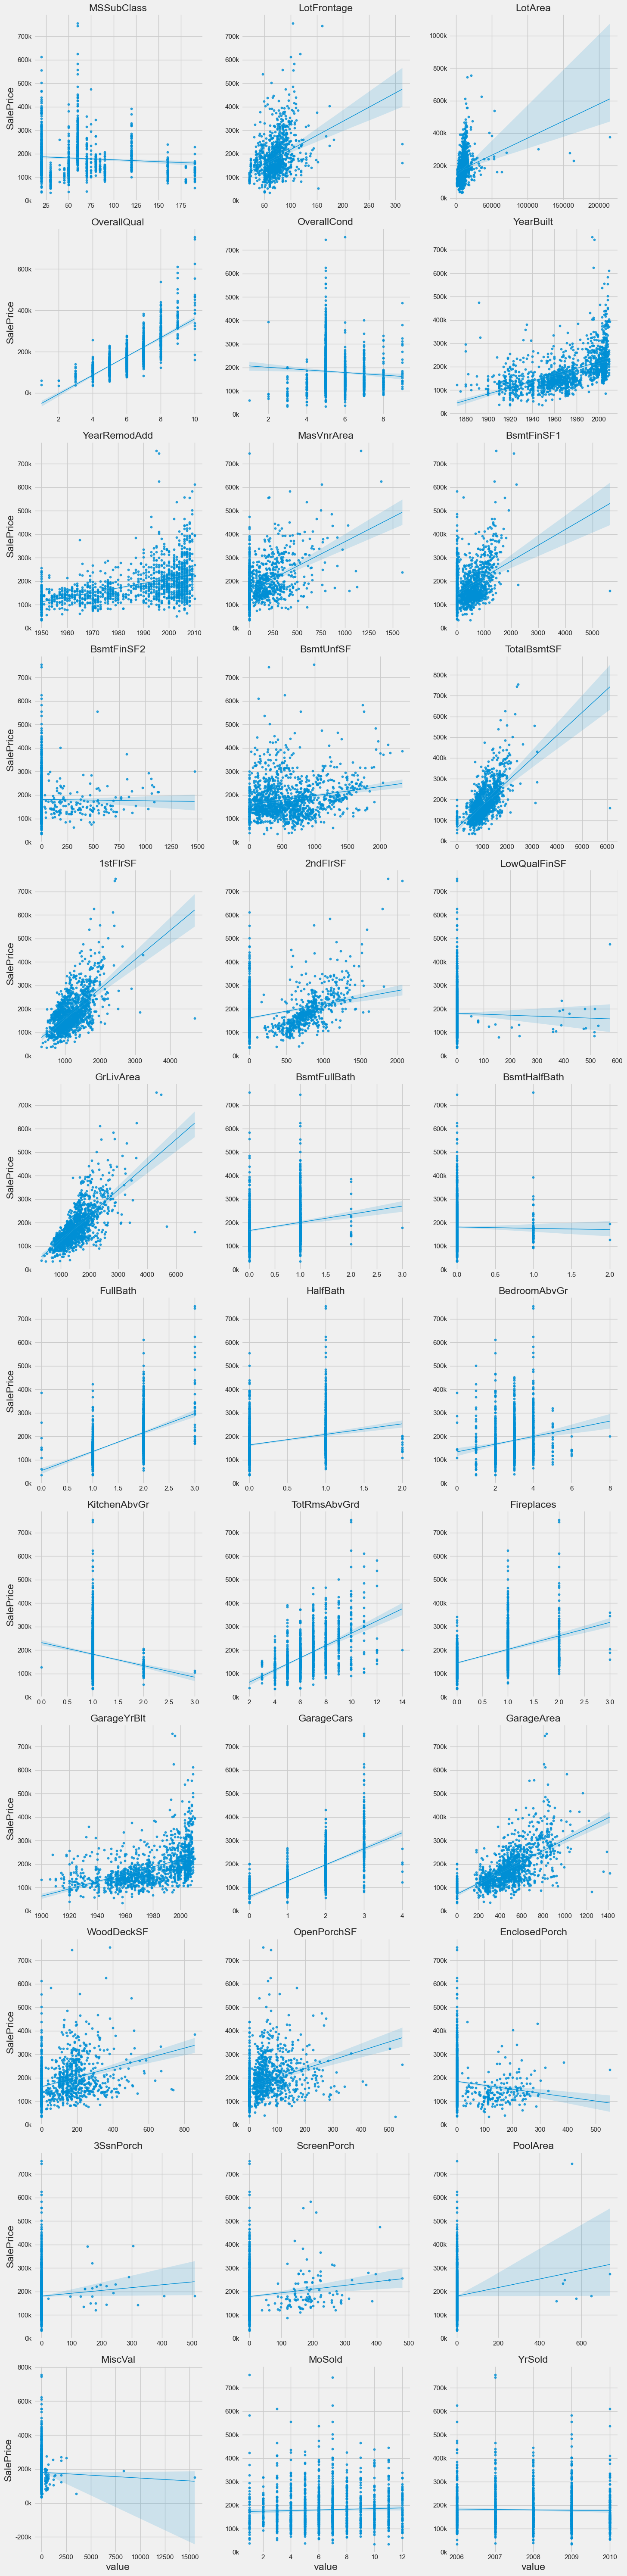

In [ ]:

########### SCATTERPLOTS OF QUANTITATIVE FEATURES VS TARGET ###########

# Assuming DataFrame 'train' and 'quantitative' is the list of columns
f = pd.melt(train, id_vars=[target], value_vars=quantitative)

# Create a FacetGrid for plotting
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)

# Map regplots
g.map(sns.regplot, "value", target, scatter_kws={'s': 10}, line_kws={'linewidth': 1})
g.set_titles(col_template="{col_name}")

# Format y-axis ticks to use 'k' for thousands
def thousand_formatter(x, pos):
    return f'{int(x * 1e-3)}k'

for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(FuncFormatter(thousand_formatter))



By looking at the above graphs, one should look for correlations or patterns between the variables. 
A clear trend might suggest a relationship.
Clusters: Check if there are natural groupings or clusters in the data.
Outliers: Identify any points that deviate significantly from the general trend.

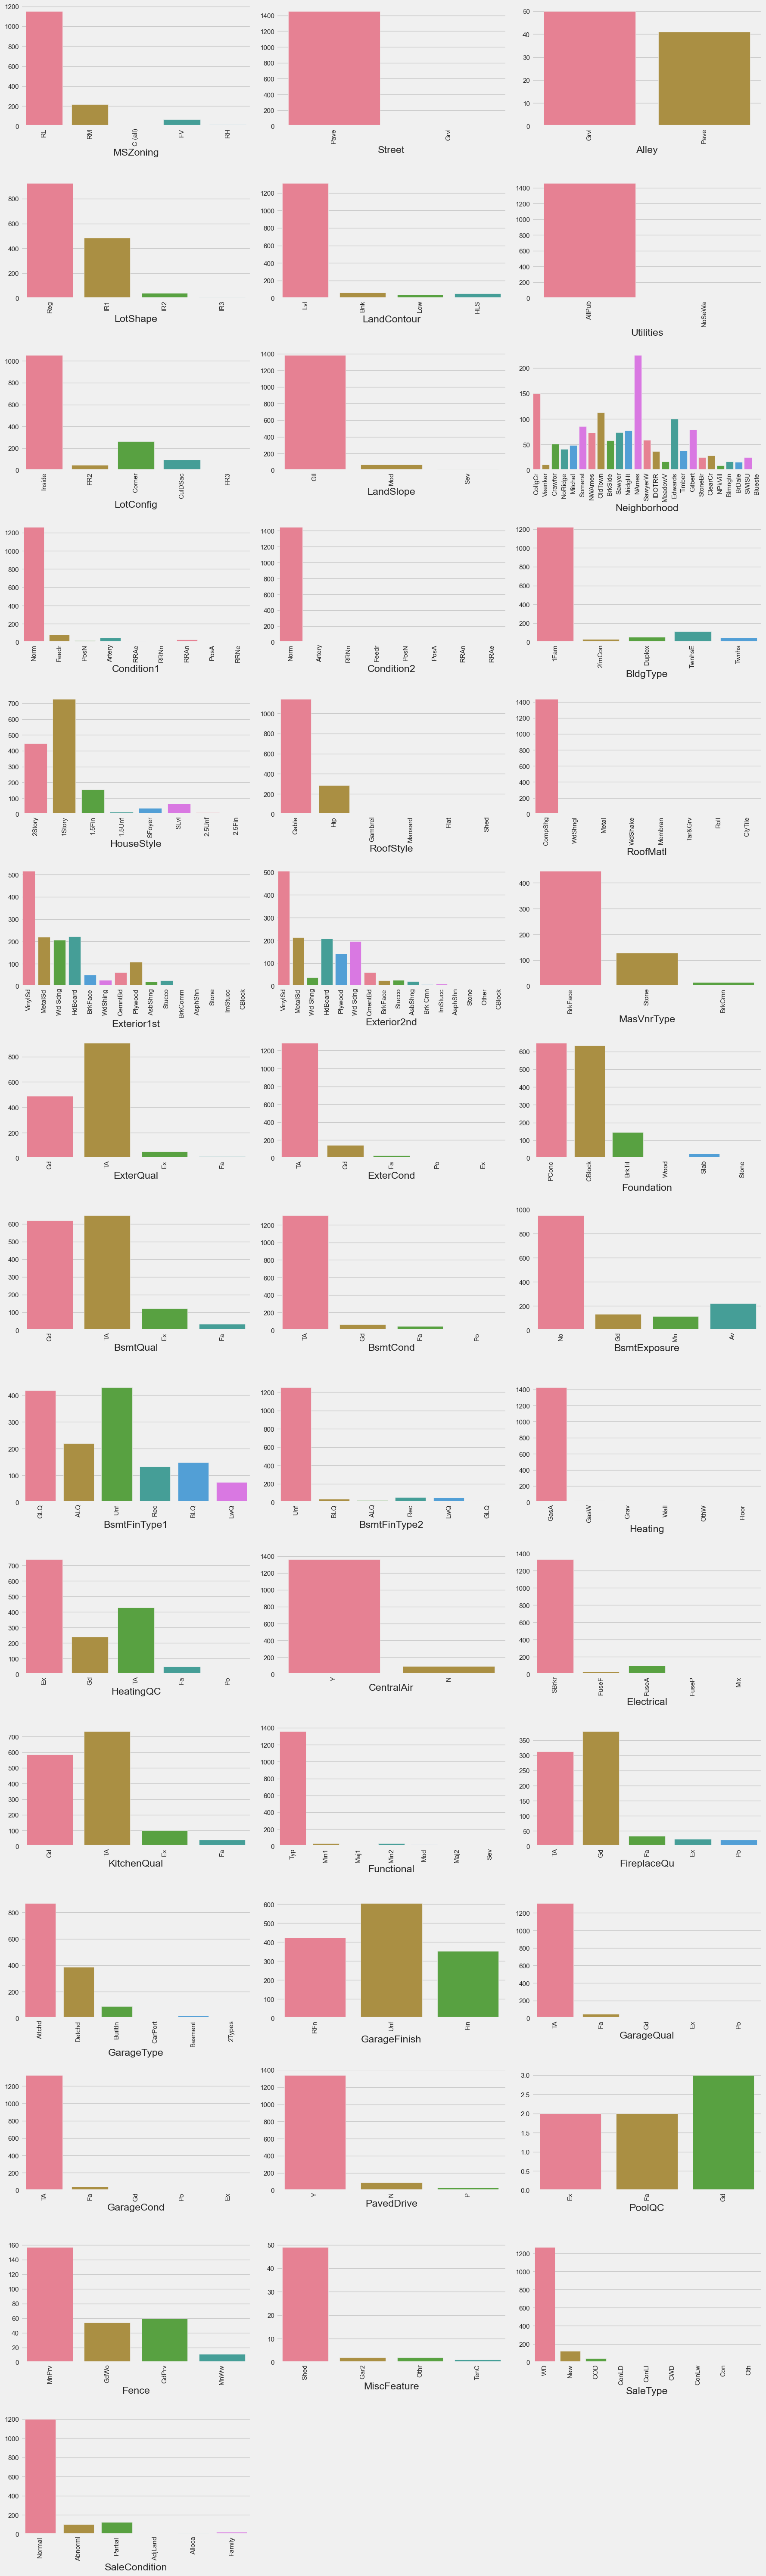

In [ ]:

########### QUALITATIVE FEATURES ###########

num_features = len(categorical)
num_cols = 3                                                                # Number of columns in the grid
num_rows = (num_features // num_cols) + int(num_features % num_cols > 0)    # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))    # Adjust figsize as needed
axes = axes.flatten()                                                       # Flatten in case of a 2D array of axes

palette = sns.color_palette("husl", 10)                                     # Change the number of colors as needed

for i, feature in enumerate(categorical):
    sns.countplot(data=subset_df, x=feature, ax=axes[i], palette=sns.color_palette("husl"))
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


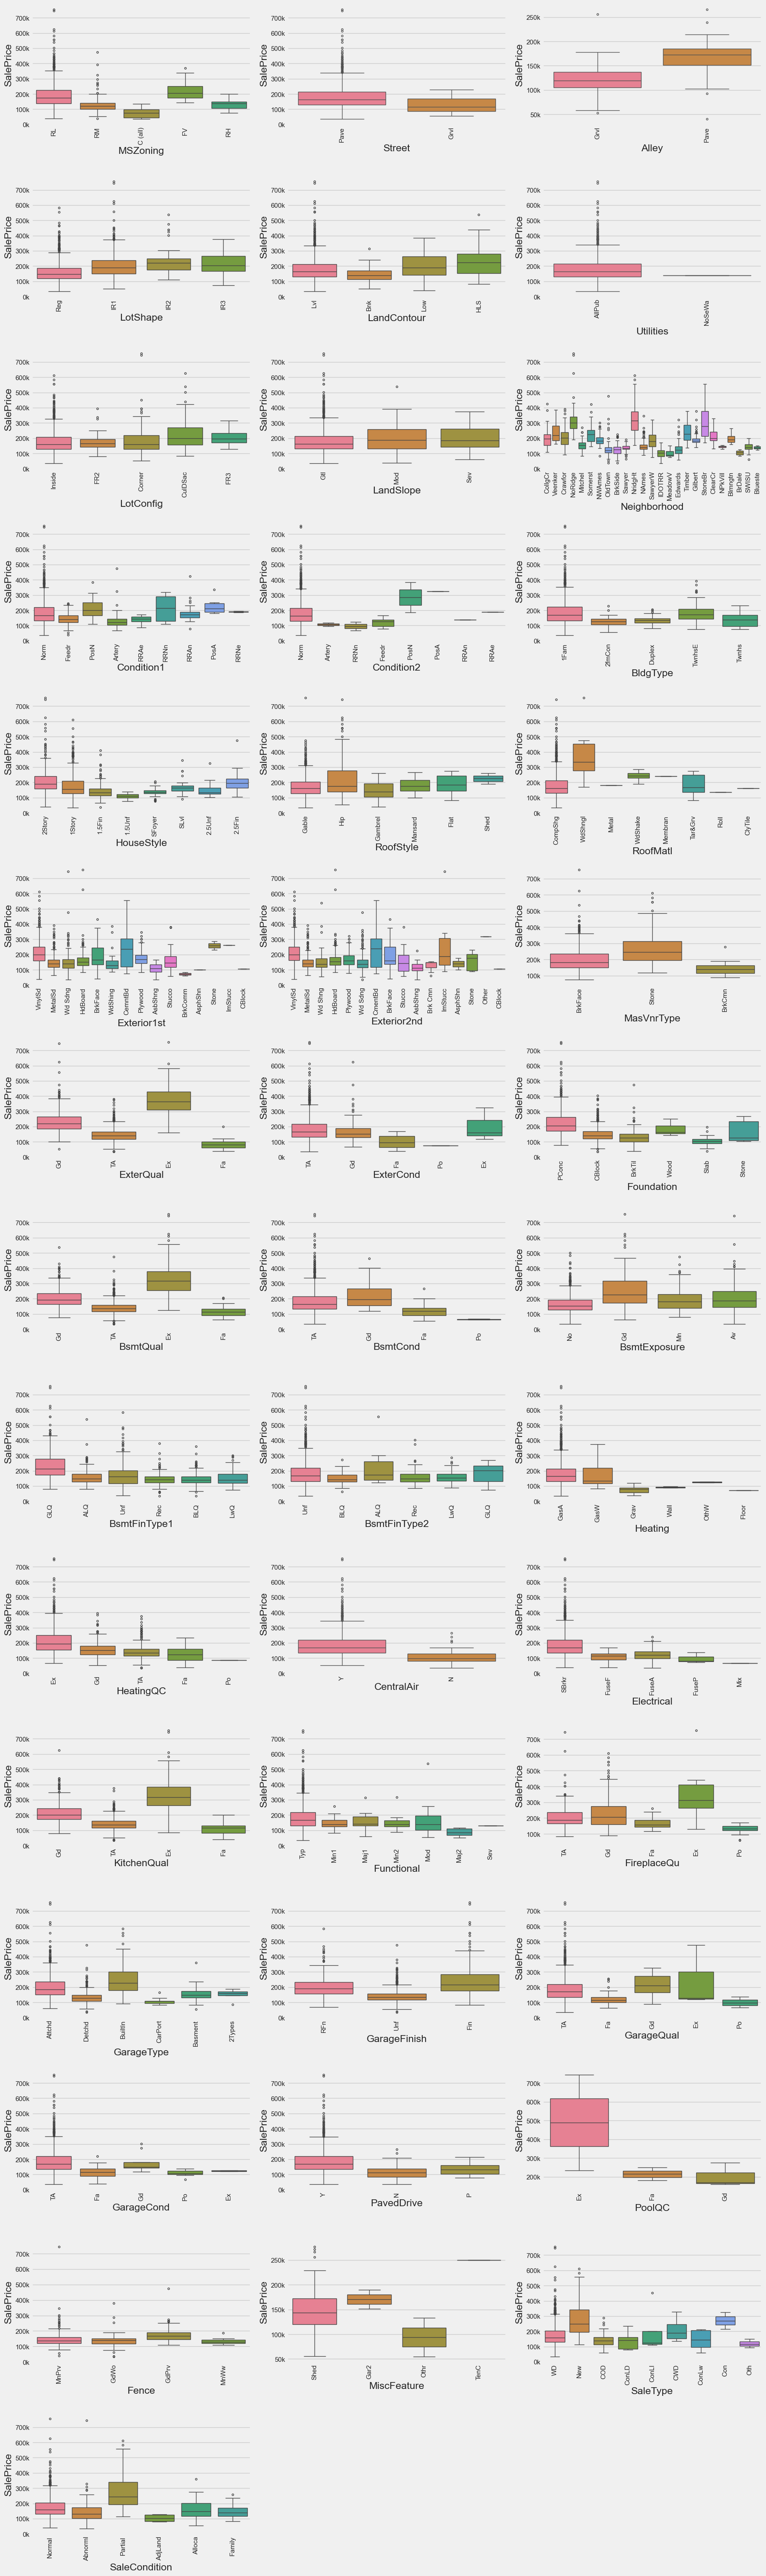

In [ ]:

########### QUALITATIVE FEATURES BOXPLOTS ###########


num_features = len(categorical)
num_cols = 3                                                                # Number of columns in the grid
num_rows = (num_features // num_cols) + int(num_features % num_cols > 0)    # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))    # Adjust figsize as needed

axes = axes.flatten()                                                       # Flatten in case of a 2D array of axes

palette = sns.color_palette("husl", 10)                                     # Change the number of colors as needed

def thousand_formatter(x, pos):
    return f'{int(x * 1e-3)}k'

for i, feature in enumerate(categorical):
    sns.boxplot(data=subset_df, x=feature, y=target, ax=axes[i], palette=palette, fliersize=3)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel('SalePrice')
    axes[i].yaxis.set_major_formatter(FuncFormatter(thousand_formatter))
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


Text(0.5, 1.0, 'Correlation Matrix of all Numerical Variables')

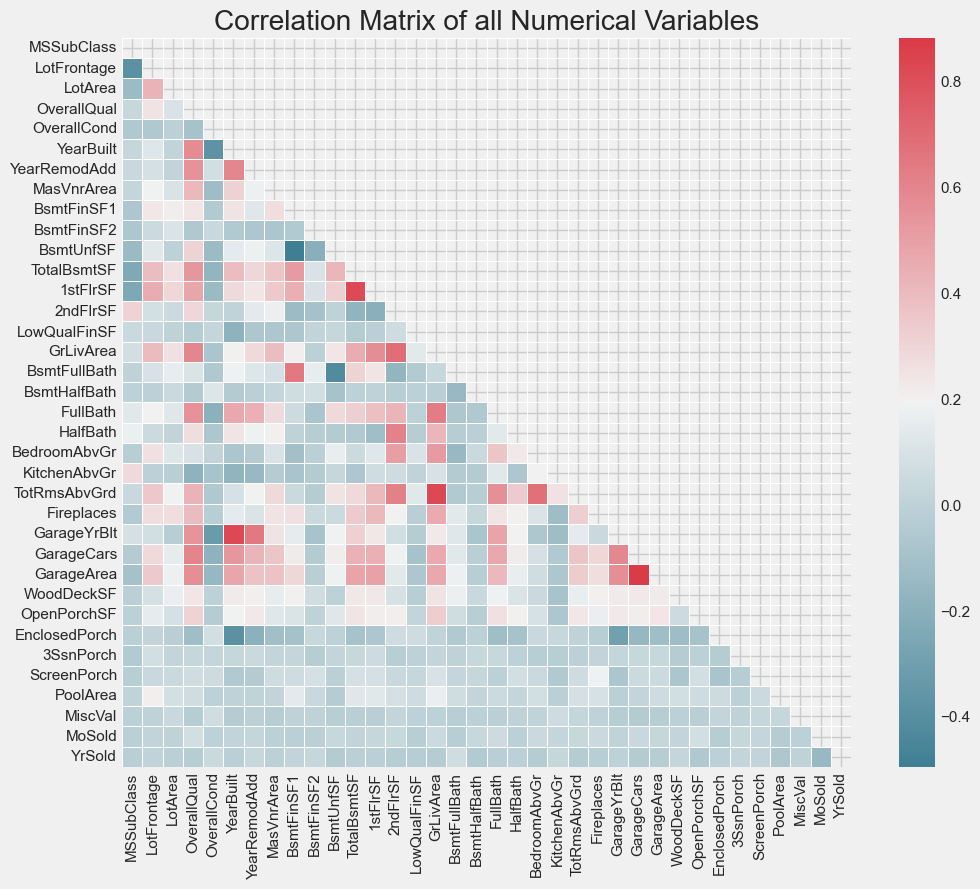

In [ ]:

########### CORRELATION MATRIX ###########

d = train[quantitative]
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')



Text(0, 0.5, 'Features')

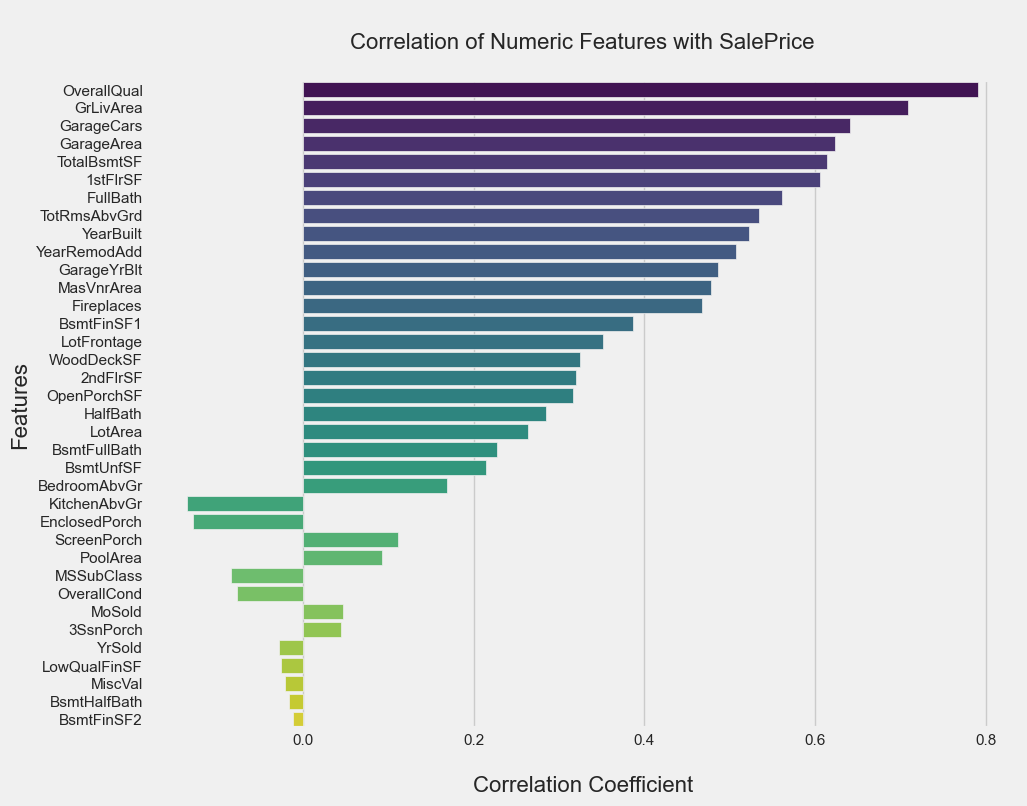

In [ ]:

########### CORRELATION OF NUMERIC FEATURES WITH TARGET ###########

d = train[quantitative + [target]]

# Calculate correlation of each numeric feature with the target variable and drop the target's correlation with itself
correlations = d.corr()[target].drop(target)  

# Sort the correlations by absolute value for better visualization
correlations = correlations.sort_values(ascending=False, key=abs)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")
plt.title(f'\nCorrelation of Numeric Features with {target}\n', size=16)
plt.xlabel('\nCorrelation Coefficient', size=16)
plt.ylabel('Features', size=16)